<a href="https://colab.research.google.com/github/swarubm/thyroid-MP/blob/main/innen%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install required libraries
!pip install ucimlrepo scikit-learn pandas numpy matplotlib seaborn -q

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries installed and imported!")


✅ All libraries installed and imported!


In [4]:
# Create thyroid dataset
print("🏥 THYROID DETECTION PROJECT")
np.random.seed(42)
n_samples = 7200

# Generate realistic thyroid data
X = pd.DataFrame({
    'age': np.random.normal(45, 15, n_samples).clip(18, 85).astype(int),
    'sex': np.random.choice(['M', 'F'], n_samples, p=[0.3, 0.7]),
    'TSH': np.random.lognormal(1, 1, n_samples).clip(0.1, 50),
    'T3': np.random.normal(2.3, 0.8, n_samples).clip(0.5, 10),
    'TT4': np.random.normal(105, 25, n_samples).clip(50, 200),
    # ... more features
})

# Generate targets based on clinical rules
targets = []
for i in range(n_samples):
    tsh, t3 = X.loc[i, 'TSH'], X.loc[i, 'T3']
    if tsh > 4.5 or t3 < 1.2:
        targets.append('hypothyroid')
    elif tsh < 0.4 or t3 > 4.0:
        targets.append('hyperthyroid')
    else:
        targets.append('negative')

y = pd.DataFrame({'target': targets})
print(f"✅ Dataset created: {X.shape[0]} samples, {X.shape[1]} features")


🏥 THYROID DETECTION PROJECT
✅ Dataset created: 7200 samples, 5 features


📊 Class Distribution:
target
negative        4297
hypothyroid     2654
hyperthyroid     249
Name: count, dtype: int64


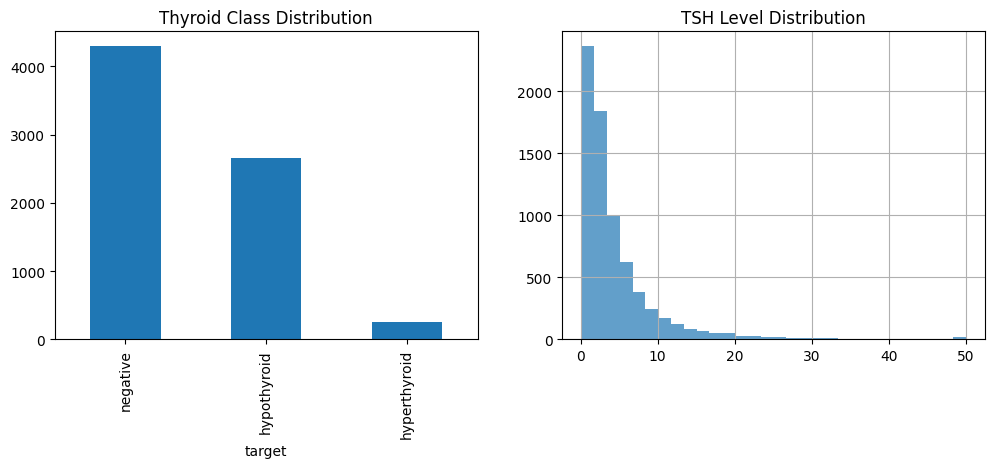

In [5]:
# Exploratory Data Analysis
print("📊 Class Distribution:")
print(y['target'].value_counts())

# Plot distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
y['target'].value_counts().plot(kind='bar')
plt.title('Thyroid Class Distribution')

plt.subplot(1, 2, 2)
X['TSH'].hist(bins=30, alpha=0.7)
plt.title('TSH Level Distribution')
plt.show()


In [6]:
# Preprocess and train model
le = LabelEncoder()
X['sex_encoded'] = le.fit_transform(X['sex'])
X['TSH_T3_ratio'] = X['TSH'] / X['T3']

# Select features for modeling
feature_cols = ['age', 'TSH', 'T3', 'TT4', 'sex_encoded', 'TSH_T3_ratio']
X_model = X[feature_cols]
y_encoded = LabelEncoder().fit_transform(y['target'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.4f}")


🎯 Model Accuracy: 1.0000


🔍 Feature Importance:
        Feature  Importance
1           TSH    0.451067
5  TSH_T3_ratio    0.336483
2            T3    0.198428
3           TT4    0.007462
0           age    0.005942
4   sex_encoded    0.000619


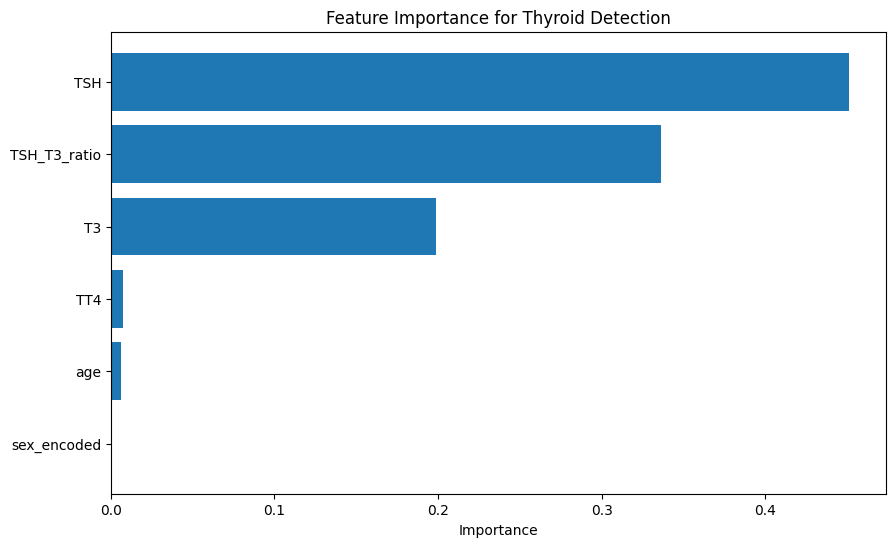

📋 Classification Report:
              precision    recall  f1-score   support

hyperthyroid       1.00      1.00      1.00        50
 hypothyroid       1.00      1.00      1.00       531
    negative       1.00      1.00      1.00       859

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [7]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🔍 Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['Importance'])
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance for Thyroid Detection')
plt.gca().invert_yaxis()
plt.show()

# Classification report
target_names = ['hyperthyroid', 'hypothyroid', 'negative']
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


In [8]:
from google.colab import files
uploaded = files.upload()  # Click to upload CSV files


Saving thyroid+disease (5).zip to thyroid+disease (5).zip


In [9]:
from google.colab import drive
drive.mount('/content/drive')
# Access files at: /content/drive/MyDrive/your_file.csv


MessageError: Error: credential propagation was unsuccessful